In [126]:
import sys
sys.path.append('/usr/local/lib/python3.6/dist-packages/')

In [127]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

In [128]:
titles = pd.read_csv('../titles.csv', index_col=None)
titles.head()

,title,year
0,Scoring!,1985
1,Yasuji no Pornorama - Yacchimae!!,1971
2,Beverly Hills Bandits,2018
3,Laakhon Hain Yahan Dilwaley,2015
4,Moksumeul geolgo,1962


In [129]:
cast = pd.read_csv('../cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


### What are the ten most common movie names of all time?

In [131]:
titles['title'].value_counts().head(10)

Hamlet                  20
Carmen                  17
Macbeth                 16
Maya                    12
Temptation              12
The Outsider            12
Freedom                 11
The Three Musketeers    11
Honeymoon               11
Othello                 11
Name: title, dtype: int64

In [12]:
titles['title'][titles.title == 'xXx']

86898    xXx
Name: title, dtype: object

### Which three years of the 1930s saw the most films released?

In [134]:
moviesOf1930s = titles[(titles.year >= 1930) & (titles.year < 1940)]

moviesOf1930s.year.value_counts()[:3]

1937    1224
1936    1169
1938    1163
Name: year, dtype: int64

### Plot the number of films that have been released each decade over the history of cinema.

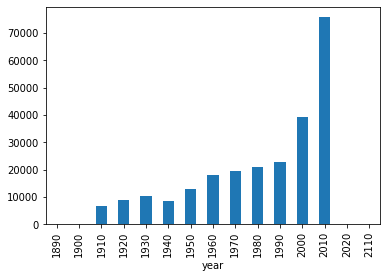

In [135]:
t = titles
t.groupby(t.year // 10 * 10).size().plot(kind='bar')
del t

### Plot the number of "Hamlet" films made each decade.

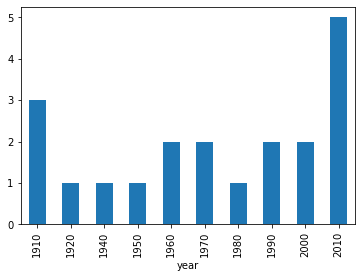

In [136]:
hFilms = titles[titles.title == 'Hamlet']
hFilms.groupby(hFilms.year // 10 * 10).size().plot(kind='bar')
del hFilms

### Plot the number of "Rustler" characters in each decade of the history of film.

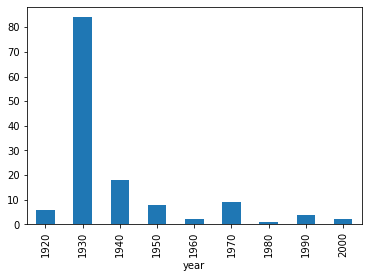

In [137]:
rust = cast[cast.character == 'Rustler']
rust.groupby(rust.year // 10 * 10).size().plot(kind='bar')
del rust

### Plot the number of "Batman" characters each decade.

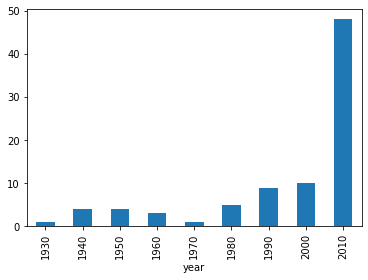

In [138]:
bat = cast[cast.character == 'Batman']
bat.groupby(bat.year // 10 * 10).size().plot(kind='bar')
del bat

### What are the 11 most common character names in movie history?

In [140]:
cast.value_counts('character')[:11]

character
Himself        20746
Dancer         12477
Extra          11948
Reporter        8434
Student         7773
Doctor          7669
Party Guest     7245
Policeman       7029
Nurse           6999
Bartender       6802
Herself         6705
dtype: int64

### Who are the 10 people most often credited as "Herself" in film history?

In [142]:
cast[cast['character'] == 'Herself'].value_counts('name')[:10]

name
Queen Elizabeth II           12
Joyce Brothers                9
Luisa Horga                   9
Mar?a Luisa (V) Mart?n        9
Margaret Thatcher             8
Hillary Clinton               8
In?s J. Southern              6
Mar?a Isabel (III) Mart?n     6
Marilyn Monroe                6
Rekha                         6
dtype: int64

### Who are the 10 people most often credited as "Himself" in film history?

In [143]:
cast[cast['character'] == 'Himself'].value_counts('name')[:10]

name
Adolf Hitler             99
Richard Nixon            44
Ronald Reagan            41
John F. Kennedy          37
George W. Bush           25
Winston Churchill        24
Martin Luther King       23
Bill Clinton             22
Ron Jeremy               22
Franklin D. Roosevelt    21
dtype: int64

### Which actors or actresses appeared in the most movies in the year 1945?

In [146]:
cast[(cast['year'] == 1945)].value_counts('name')

name
Emmett Vogan       39
Sam (II) Harris    33
Bess Flowers       29
Harold Miller      29
Franklyn Farnum    27
                   ..
L?o Albano          1
L?on Larive         1
L?on Rosy           1
L?once Corne        1
'Big' Ben Moroz     1
Length: 7824, dtype: int64

### Which actors or actresses appeared in the most movies in the year 1985?

In [147]:
cast[(cast['year'] == 1985)].value_counts('name')

name
Mammootty                22
Shakti Kapoor            21
Sukumari                 20
Raj Babbar               15
Aruna Irani              15
                         ..
Melissa Esposito          1
Melissa Gatchel North     1
Melissa Gilbert           1
Melissa Madden            1
'Chico' Hernandez         1
Length: 22998, dtype: int64

### Plot how many roles Mammootty has played in each year of his career.

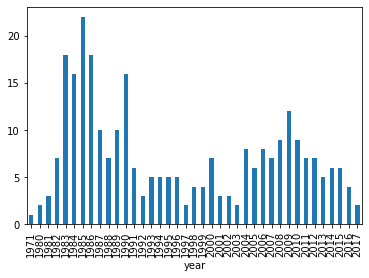

In [149]:
mam = cast[cast.name == 'Mammootty']
mam.groupby(mam.year).size().plot(kind='bar')
del mam

### What are the 10 most frequent roles that start with the phrase "Patron in"?

In [152]:
cast[cast.character.str.startswith('Patron in')].value_counts('character')[:10]

character
Patron in Frisky Rabbit         16
Patron in the Coffee House       9
Patron in Chinese Restaurant     9
Patron in Billiard Parlor        5
Patron in restaurant             4
Patron in Bar                    4
Patron in Club                   3
Patron in cabaret                3
Patron in Restaurant             3
Patron in Coffee Shop            2
dtype: int64

### What are the 10 most frequent roles that start with the word "Science"?

In [153]:
cast[cast.character.str.startswith('Science')].value_counts('character')[:10]

character
Science Teacher         60
Science Fair Student     9
Science Student          9
Science Fair Judge       6
Science Promo Cadet      5
Science Club Member      5
Science Fair Kid         5
Science Reporter         5
Science Kid              5
Science                  4
dtype: int64

### Plot the n-values of the roles that Judi Dench has played over her career.

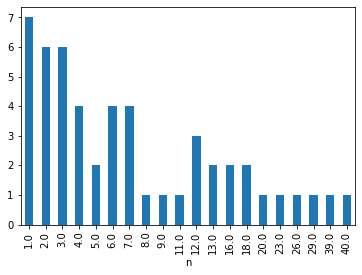

In [158]:
judi = cast[cast.name == 'Judi Dench']
judi.groupby(judi.n).size().plot(kind='bar')
del judi

### Plot the n-values of Cary Grant's roles through his career.

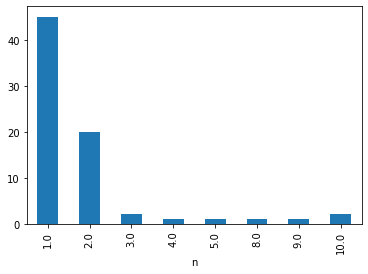

In [159]:
cary = cast[cast.name == 'Cary Grant']
cary.groupby(cary.n).size().plot(kind='bar')
del cary

### Plot the n-value of the roles that Sidney Poitier has acted over the years.

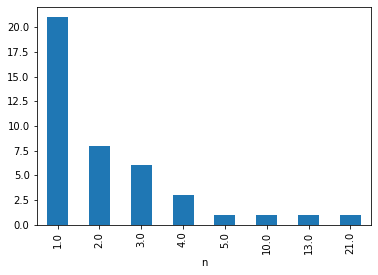

In [161]:
sid = cast[cast.name == 'Sidney Poitier']
sid.groupby(sid.n).size().plot(kind='bar')
del sid

### How many leading (n=1) roles were available to actors, and how many to actresses, in the 1950s?

In [162]:
cast[(cast['year'] >= 1950) & (cast['year'] < 1960) & (cast['n'] == 1)].value_counts('type')

type
actor      6692
actress    3040
dtype: int64

### How many supporting (n=2) roles were available to actors, and how many to actresses, in the 1950s?

In [163]:
cast[(cast['year'] >= 1950) & (cast['year'] < 1960) & (cast['n'] == 2)].value_counts('type')

type
actor      4640
actress    4635
dtype: int64